In [1]:
import pyextremes
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/all_all_nonstd.nc")

In [3]:
import src.Teleconnection.tools as tools

In [4]:
index = tools.standardize(index)

In [5]:
index

<xarray.Dataset>
Dimensions:  (hlayers: 11, mode: 2, ens: 100, time: 149)
Coordinates:
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode     (mode) object 'NAO' 'EA'
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * time     (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00
Data variables:
    pc       (hlayers, mode, ens, time) float64 0.6557 1.639 ... 0.1087 -1.062

In [6]:
NAO = index.sel(hlayers = 50000, mode = 'NAO').pc

In [7]:
NAO['time'] = NAO.indexes['time'].to_datetimeindex()

/tmp/ipykernel_4143457/1583384904.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  NAO['time'] = NAO.indexes['time'].to_datetimeindex()


In [8]:
xr.corr(NAO.isel(ens = 0), NAO.isel(ens = 1))

<xarray.DataArray 'pc' ()>
array(-0.12828352)
Coordinates:
    hlayers  float64 5e+04
    mode     <U3 'NAO'

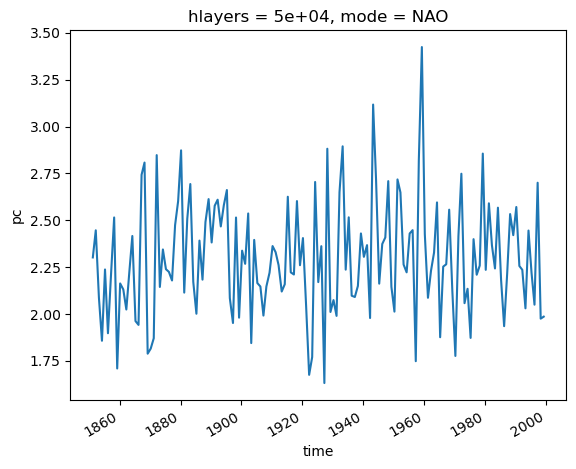

In [9]:
NAO.max(dim = 'ens').plot()

In [10]:
import pyextremes

In [11]:
from pyextremes import get_extremes, get_return_periods

In [12]:
all_extreme = NAO.max(dim = 'ens').to_dataframe()['pc']

In [13]:
all_return_periods = get_return_periods(
    ts=all_extreme,
    extremes=all_extreme,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="cunnane",
)
all_return_periods.sort_values("return period", ascending=False).head()

,pc,exceedance probability,return period
time,,,
1959-03-16 11:52:00,3.424185,0.004021,248.666667
1943-03-16 11:52:00,3.117376,0.010724,93.250000
1933-03-16 11:52:00,2.894565,0.017426,57.384615
1928-03-03 23:52:00,2.881654,0.024129,41.444444
1880-03-03 23:52:00,2.873070,0.030831,32.434783


In [14]:
all_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1959-03-16 11:52:00,3.424185,0.004021,248.666667
1943-03-16 11:52:00,3.117376,0.010724,93.250000
1933-03-16 11:52:00,2.894565,0.017426,57.384615
1928-03-03 23:52:00,2.881654,0.024129,41.444444
1880-03-03 23:52:00,2.873070,0.030831,32.434783
...,...,...,...
1923-03-16 11:52:00,1.770301,0.969169,1.031812
1957-03-16 11:52:00,1.748263,0.975871,1.024725
1859-03-16 11:52:00,1.709407,0.982574,1.017735


In [14]:
first_extrmes = NAO.sel(time = slice('1850','1860')).max(dim = 'ens').to_dataframe()['pc']

In [15]:
first_return_periods = get_return_periods(
    ts=first_extrmes,
    extremes=first_extrmes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="cunnane",
)
first_return_periods.sort_values("return period", ascending=False).head()

,pc,exceedance probability,return period
time,,,
1858-03-16 11:52:00,2.515081,0.058824,17.000000
1852-03-03 23:52:00,2.446520,0.156863,6.375000
1851-03-16 11:52:00,2.301832,0.254902,3.923077
1855-03-16 11:52:00,2.237606,0.352941,2.833333
1857-03-16 11:52:00,2.218939,0.450980,2.217391


In [17]:
first_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1858-03-16 11:52:00,2.515081,0.058824,17.000000
1852-03-03 23:52:00,2.446520,0.156863,6.375000
1851-03-16 11:52:00,2.301832,0.254902,3.923077
1855-03-16 11:52:00,2.237606,0.352941,2.833333
1857-03-16 11:52:00,2.218939,0.450980,2.217391
1860-03-03 23:52:00,2.163130,0.549020,1.821429
1853-03-16 11:52:00,2.086981,0.647059,1.545455
1856-03-03 23:52:00,1.897405,0.745098,1.342105
1854-03-16 11:52:00,1.857287,0.843137,1.186047


In [18]:
last_extremes = NAO.sel(time = slice('1989','1999')).max(dim = 'ens').to_dataframe()['pc']

In [20]:
last_return_periods = get_return_periods(
    ts=last_extremes,
    extremes=last_extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="cunnane",
)
last_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1997-03-16 11:52:00,2.700349,0.053571,18.666667
1990-03-16 11:52:00,2.570850,0.142857,7.000000
1994-03-16 11:52:00,2.445306,0.232143,4.307692
1989-03-16 11:52:00,2.420669,0.321429,3.111111
1991-03-16 11:52:00,2.256286,0.410714,2.434783
1992-03-03 23:52:00,2.235638,0.500000,2.000000
1995-03-16 11:52:00,2.219427,0.589286,1.696970
1996-03-03 23:52:00,2.049780,0.678571,1.473684
1993-03-16 11:52:00,2.030279,0.767857,1.302326


<AxesSubplot:xlabel='return period'>

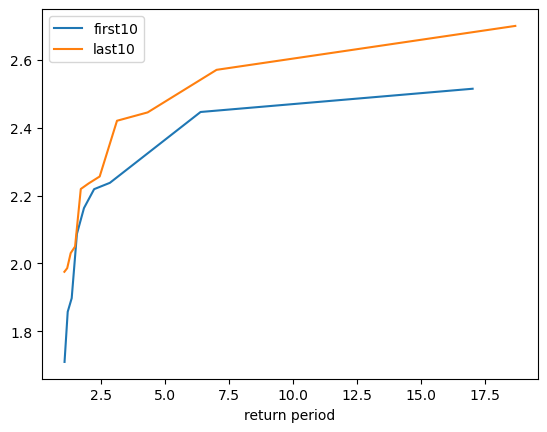

In [29]:
ax = plt.subplot()
first_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'first10')
last_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'last10')


In [15]:
all_return_periods

,pc,exceedance probability,return period
time,,,
1851-03-16 11:52:00,2.301832,0.446381,2.240240
1852-03-03 23:52:00,2.446520,0.285523,3.502347
1853-03-16 11:52:00,2.086981,0.761394,1.313380
1854-03-16 11:52:00,1.857287,0.935657,1.068768
1855-03-16 11:52:00,2.237606,0.520107,1.922680
...,...,...,...
1995-03-16 11:52:00,2.219427,0.587131,1.703196
1996-03-03 23:52:00,2.049780,0.794906,1.258010
1997-03-16 11:52:00,2.700349,0.104558,9.564103


In [24]:
first10_all_return_periods = all_return_periods[all_return_periods.index.isin('1850','1860')]

KeyError: 'Requested level (1860) does not match index name (time)'

In [ ]:
first10_all_return_periods

In [18]:
last10_all_return_periods = all_return_periods.between_time('1989','1999')

In [20]:
last10_all_return_periods

,pc,exceedance probability,return period
time,,,


<AxesSubplot:xlabel='return period'>

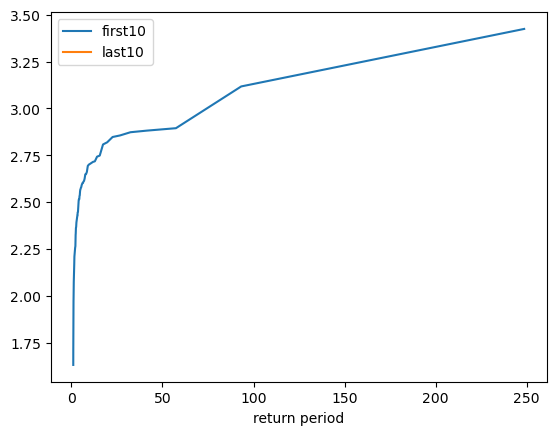

In [19]:
ax = plt.subplot()
first10_all_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'first10')
last10_all_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'last10')
